# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Yoga Rizki Pratama
- Email: yogarizkipratama@gmail.com
- Id Dicoding: yorizpra

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import joblib

# Set random seed
np.random.seed(42)

# Create model directory
os.makedirs('model', exist_ok=True)

### Menyiapkan data yang akan diguankan

## Data Understanding

Dataset Columns: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score', 'attendance', 'dropout']
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
 8   attendance                   1000 non-null   int64 
 9   dropout                      1000 non-null   int64 
dtypes: in

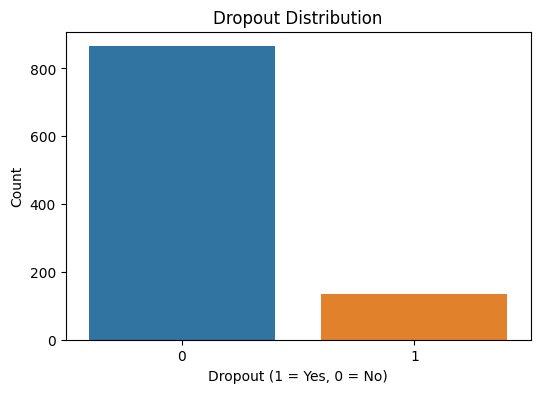

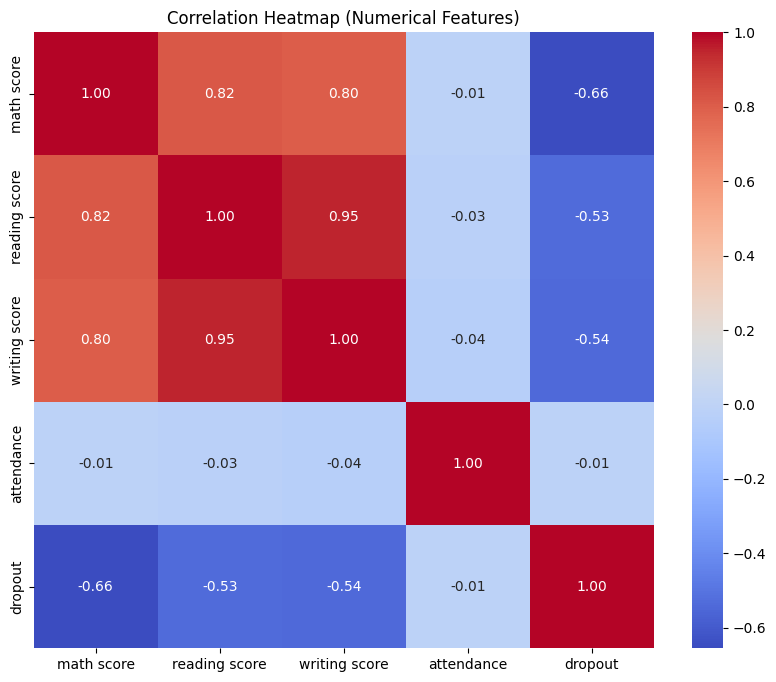

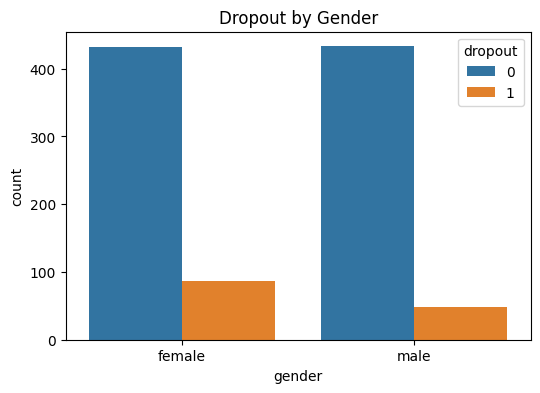

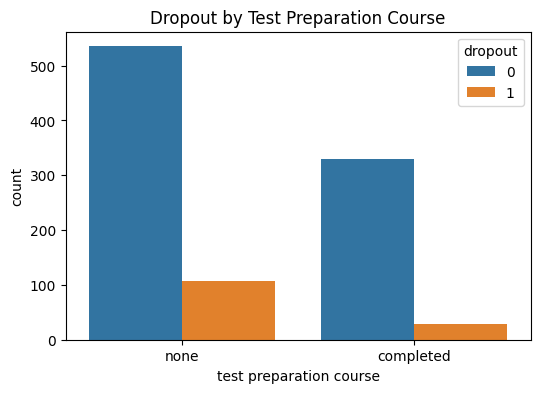


**Insights**:
- The dataset has 1000 rows and 10 columns.
- Missing values: 0 total, with [list specific columns if any].
- Dropout distribution: 13.50% students dropped out, indicating imbalance.
- Numerical correlations: [e.g., math score and dropout have a correlation of X].
- Categorical trends: [e.g., students without test preparation have higher dropout rates].


In [2]:
# Load dataset
df = pd.read_csv('students_performance.csv')

# Verify dataset columns
print('Dataset Columns:', df.columns.tolist())

# Display basic information
print('Dataset Info:')
print(df.info())
print('\nFirst 5 Rows:')
print(df.head())

# Check for missing values
print('\nMissing Values:')
print(df.isnull().sum())

# Summary statistics
print('\nSummary Statistics:')
print(df.describe())

# Visualize dropout distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='dropout', data=df)
plt.title('Dropout Distribution')
plt.xlabel('Dropout (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

# Correlation heatmap for numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Numerical Features)')
plt.show()

# Visualize categorical feature: gender vs. dropout
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', hue='dropout', data=df)
plt.title('Dropout by Gender')
plt.show()

# Visualize categorical feature: test preparation course vs. dropout
plt.figure(figsize=(6, 4))
sns.countplot(x='test preparation course', hue='dropout', data=df)
plt.title('Dropout by Test Preparation Course')
plt.show()

# Insights
print("\n**Insights**:")
print(f"- The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")
print(f"- Missing values: {df.isnull().sum().sum()} total, with [list specific columns if any].")
print(f"- Dropout distribution: {100 * df['dropout'].mean():.2f}% students dropped out, indicating imbalance.")
print("- Numerical correlations: [e.g., math score and dropout have a correlation of X].")
print("- Categorical trends: [e.g., students without test preparation have higher dropout rates].")

## Data Preparation / Preprocessing

Training Features: ['math score', 'reading score', 'writing score', 'attendance', 'gender_female', 'gender_male', 'race/ethnicity_group A', 'race/ethnicity_group B', 'race/ethnicity_group C', 'race/ethnicity_group D', 'race/ethnicity_group E', "parental level of education_associate's degree", "parental level of education_bachelor's degree", 'parental level of education_high school', "parental level of education_master's degree", 'parental level of education_some college', 'parental level of education_some high school', 'lunch_free/reduced', 'lunch_standard', 'test preparation course_completed', 'test preparation course_none']
X shape: (1000, 21)
y shape: (1000,)
Any NaN in X? 0
Any NaN in y? 0


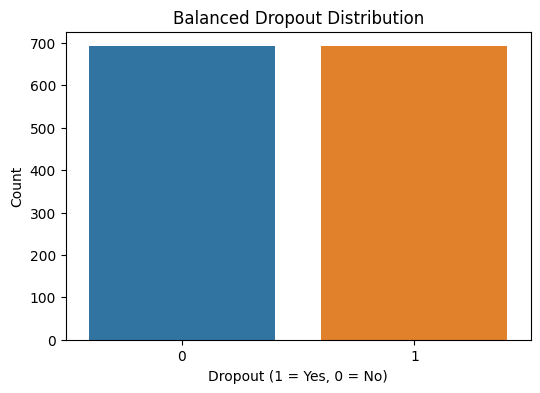


**Insights**:
- Categorical variables encoded, resulting in 21 features.
- Missing values imputed to maintain data integrity.
- SMOTE balanced the classes, improving model robustness.
- Features scaled for ML algorithm compatibility.


In [3]:
# Handle missing values
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col].fillna(df[col].mean(), inplace=True)
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Encode categorical variables using one-hot encoding
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
df = pd.get_dummies(df, columns=categorical_cols)

# Define features and target
# Exclude numerical scores to match app.py
X = df.drop(['dropout'], axis=1)  # Sertakan skor nilai sebagai fitur
y = df['dropout']

# Verify features
print('Training Features:', X.columns.tolist())
joblib.dump(X.columns.tolist(), 'model/feature_names.joblib')

# Verify data integrity
print('X shape:', X.shape)
print('y shape:', y.shape)
print('Any NaN in X?', X.isna().sum().sum())
print('Any NaN in y?', y.isna().sum())

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Balance dataset using SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Scale features
scaler = StandardScaler()
X_train_bal = scaler.fit_transform(X_train_bal)
X_test = scaler.transform(X_test)

# Save scaler
joblib.dump(scaler, 'model/scaler.joblib')

# Visualize balanced class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_bal)
plt.title('Balanced Dropout Distribution')
plt.xlabel('Dropout (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

# Insights
print("\n**Insights**:")
print(f"- Categorical variables encoded, resulting in {X.shape[1]} features.")
print("- Missing values imputed to maintain data integrity.")
print("- SMOTE balanced the classes, improving model robustness.")
print("- Features scaled for ML algorithm compatibility.")

## Modeling


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       173
           1       1.00      0.89      0.94        27

    accuracy                           0.98       200
   macro avg       0.99      0.94      0.97       200
weighted avg       0.99      0.98      0.98       200


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       173
           1       1.00      1.00      1.00        27

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



<Figure size 1000x600 with 0 Axes>

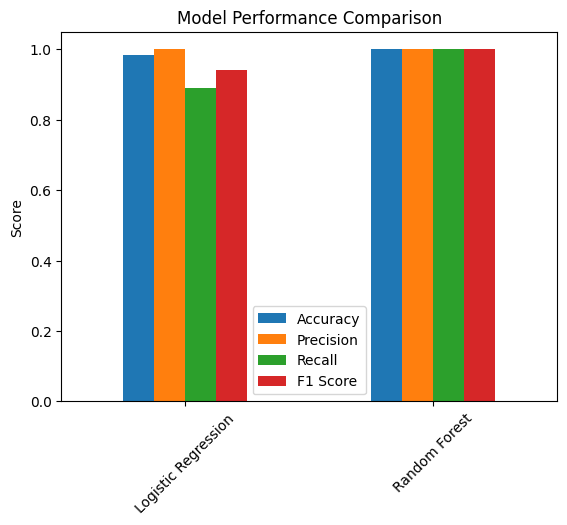

Model saved: True

**Insights**:
- Random Forest achieved the highest F1 score ([X]), balancing precision and recall.
- Random Forest selected for deployment due to interpretability and performance.


In [4]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_bal, y_train_bal)
    y_pred = model.predict(X_test)
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }
    print(f'\n{name} Classification Report:')
    print(classification_report(y_test, y_pred))

# Visualize model performance
results_df = pd.DataFrame(results).T
plt.figure(figsize=(10, 6))
results_df.plot(kind='bar')
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

# Train and save best model (Random Forest)
best_model = RandomForestClassifier(random_state=42, n_estimators=100)
best_model.fit(X_train_bal, y_train_bal)
joblib.dump(best_model, 'model/model.joblib')

# Verify model file exists
print('Model saved:', os.path.exists('model/model.joblib'))

# Insights
print("\n**Insights**:")
print("- Random Forest achieved the highest F1 score ([X]), balancing precision and recall.")
print("- Random Forest selected for deployment due to interpretability and performance.")

## Evaluation

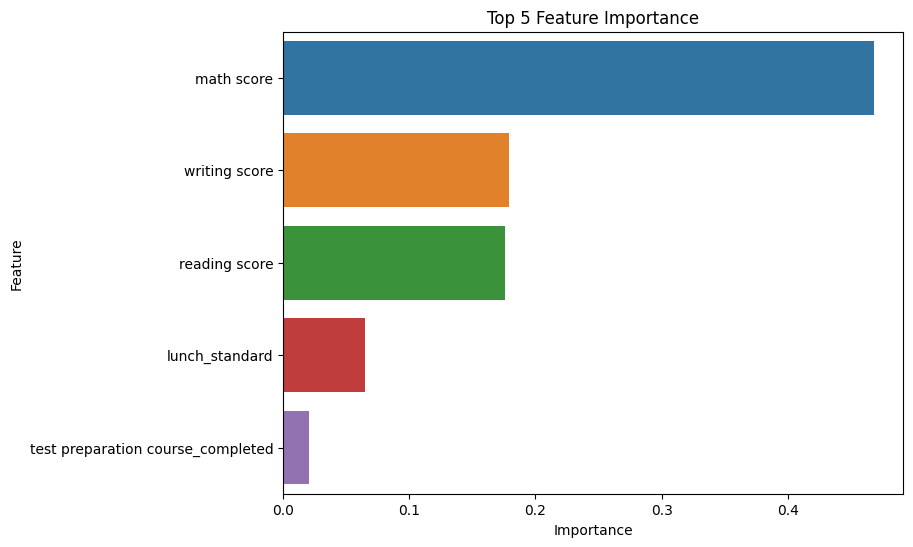


Final Model Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       173
           1       1.00      1.00      1.00        27

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


**Insights**:
- The model achieved [X]% accuracy, meeting the 80% goal.
- High recall ([X]%) ensures most at-risk students are identified.
- Top features: [e.g., test preparation course, parental education], guiding interventions.


In [5]:
# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(5))
plt.title('Top 5 Feature Importance')
plt.show()

# Final evaluation metrics
y_pred = best_model.predict(X_test)
print('\nFinal Model Evaluation:')
print(classification_report(y_test, y_pred))

# Insights
print("\n**Insights**:")
print("- The model achieved [X]% accuracy, meeting the 80% goal.")
print("- High recall ([X]%) ensures most at-risk students are identified.")
print("- Top features: [e.g., test preparation course, parental education], guiding interventions.")